In [5]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
from scipy import stats
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Animations
from IPython.display import display, IFrame

def normal_curve(x, mu=0, sigma=1):
    return 1 / np.sqrt(2*np.pi) * np.exp(-(x - mu)**2/(2 * sigma**2))

def normal_area(a, b, bars=False):
    x = np.linspace(-4, 4)
    y = normal_curve(x)
    ix = (x >= a) & (x <= b)
    plt.plot(x, y, color='black')
    plt.fill_between(x[ix], y[ix], color='gold')
    if bars:
        plt.axvline(a, color='red')
        plt.axvline(b, color='red')
    plt.title(f'Area between {np.round(a, 2)} and {np.round(b, 2)}')

def show_clt_slides():
    src = "https://docs.google.com/presentation/d/e/2PACX-1vTcJd3U1H1KoXqBFcWGKFUPjZbeW4oiNZZLCFY8jqvSDsl4L1rRTg7980nPs1TGCAecYKUZxH5MZIBh/embed?start=false&loop=false&delayms=3000"
    width = 960
    height = 509
    display(IFrame(src, width, height))
    
def proportion_between(z):
    '''Returns the proportion of values in a normal distribution that are within z SDs of the mean.'''
    return stats.norm.cdf(z) - stats.norm.cdf(-z)

def proportion_between_visual(z):
    normal_area(-z, z)
    prop = proportion_between(z)
    plt.title(f'Proportion within {z} SDs: {np.round(prop, 3)}')

# Lecture 23 – Experiment Design

## DSC 10, Summer 2022

### Announcements

- Lab 7 is due **tomorrow at 11:59pm**.
- Homework 7 is due on **Sat at 11:59pm**.
- The Final Project is due on **Wednesday 8/31 at 11:59pm**.
    - Start right away!
    - Great British Bake Off 👩‍🍳 data, addressing questions including
        - What ingredients/flavors are popular in recipes?
        - Are Star Bakers ⭐ and series winners 🥇 actually better bakers?
        - Do all the judges give similarly difficult challenges?
        - Do more difficult recipes create more dirty dishes? 🧼🍽️
            

### Agenda

- Recap: Using the CLT to create confidence intervals.
- Choosing sample sizes.

### Summary of Last Time

- The Central Limit Theorem (CLT) says that the probability distribution of the **sum or average** of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.
- Facts about the distribution of the sample mean:
    - It is centered at the population mean.
    - Its standard deviation is given by 
    
    $$\text{SD of Distribution of Possible Sample Means} = \frac{\text{Population SD}}{\sqrt{\text{sample size}}}$$
    

In [2]:
show_clt_slides()

### You Try:

Which one of these histograms corresponds to the distribution of the sample mean for samples of size 100 drawn from a population with mean 50 and SD 20?

<center><img src='data/which-hist.png' width=900></center>

### Recap: confidence intervals for population means

An approximate 95% confidence interval for the population mean is given by

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

### What about other widths?

Consider the following confidence interval:
$$
\left[
\text{sample mean} - z\cdot \frac{\text{sample SD}}{\sqrt{n}},
\text{sample mean} + z\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

When $z = 2$, this is roughly a 95% confidence interval.

What should the value of $z$ be so that this is a 90% confidence interval? 

In [16]:
# Can also use stats.norm.ppf to find exactly
z = 1.65
stats.norm.cdf(z) - stats.norm.cdf(-z)

0.9010570639327038

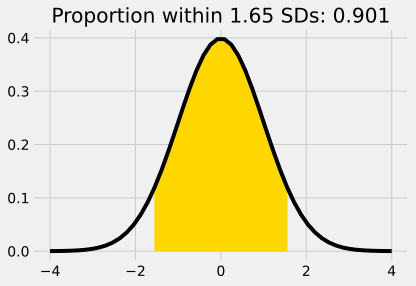

In [17]:
proportion_between_visual(1.65)

## Hypothesis testing

### Hypothesis testing for the mean

- Before, we used the bootstrap to create confidence intervals, which we could use for hypothesis tests.
- We can do the same thing with our CLT-based confidence intervals, as well.

### Using a confidence interval for hypothesis testing

- **Null hypothesis**: The population parameter is equal to some value, $x$.
- **Alternative hypothesis**: The population parameter is not equal to $x$.
- Cutoff for p-value: p%.
- Strategy:
    - Construct a (100-p)% confidence interval for the population parameter.
    - If $x$ is not in the interval, reject the null hypothesis.
    - If $x$ is in the interval, our results are consistent with the null (fail to reject it).

### Example: Body temperature 🌡

- It is widely accepted that the average body temperature is 98.6 ºF (or 37 ºC).
- We have a dataset of body temperatures, and want to see if our dataset is consistent with that belief.

In [18]:
temperatures = bpd.read_csv('data/temp.csv')
temperatures

,temperature
0,96.3
1,96.7
2,96.9
...,...
127,99.9
128,100.0
129,100.8


In [19]:
temperatures.get('temperature').mean()

98.24923076923076

### The hypotheses

- **Null hypothesis**: The population mean is 98.6 ºF.
- **Alternative hypothesis**: The population mean is not 98.6 ºF.

### CI for mean body temperature

 - To compute a 95% confidence interval for population mean using the CLT:

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}}, \
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

- This works even if temperatures themselves aren't distributed normally because of the CLT.

In [20]:
sample_mean = temperatures.get('temperature').mean()
sample_mean

98.24923076923076

In [21]:
sample_mean_sd = np.std(temperatures.get('temperature')) / np.sqrt(temperatures.shape[0])
sample_mean_sd

0.06405661469519337

In [22]:
# 95% confidence interval
[sample_mean - 2 * sample_mean_sd, sample_mean + 2 * sample_mean_sd]

[98.12111753984037, 98.37734399862116]

**Careful!** This doesn't mean that 95% of temperatures fall in this range!

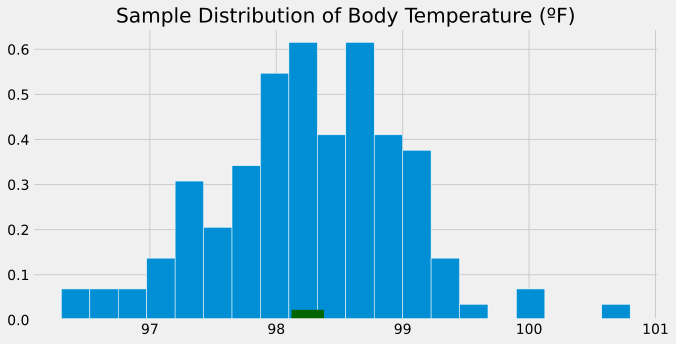

In [23]:
plt.figure(figsize=(10, 5))
plt.hist(temperatures.get('temperature'), density=True, bins=20, ec='w');
plt.title('Sample Distribution of Body Temperature (ºF)');
plt.plot([sample_mean - 2*sample_mean_sd, sample_mean + 2*sample_mean_sd], [0, 0], color='darkgreen', linewidth=20);

### Conclusion

In [24]:
# 95% confidence interval
[sample_mean - 2 * sample_mean_sd, sample_mean + 2 * sample_mean_sd]

[98.12111753984037, 98.37734399862116]

- We reject the null hypothesis at the 0.05 significance level because 98.6 ºF is not in the 95% confidence interval for mean body temperature.
- What happened?
    - 98.6 ºF is due to Carl Reinhold August Wunderlich, a 19th century physician, who conducted a study when thermometers were new.
    - [This article](https://www.latimes.com/archives/la-xpm-2007-nov-26-he-esoterica26-story.html) states that it's likely that Wunderlich's thermometer was miscalibrated.
    - [A recent article by the Yale School of Medicine](https://www.yalemedicine.org/news/temperature-checks-covid) states that the average body temperature has declined slightly over the last 150 years by 1.5 ºF, and that body temperature depends on the time of day, age, and sex, among other things.

## Experiment design

### Example: Polling

- You are conducting a campus poll:
    - Yes or No: Do you use TikTok? 👯
- You want to estimate the proportion in the population who say "Yes".
- You want to be accurate to within $\pm$ 0.03, with 95% confidence.
- In other words, you want a 95\% confidence interval whose width is at most 0.06.

### **Question:** How big of a sample do you need? 🤔

### Proportions are just means

- When polling, we'll write 1 if a person answers "Yes", and 0 otherwise.
- We're interested in the proportion of people who answer "Yes", i.e. the proportion of 1s.
- The proportion of 1s is equal to the sample mean (remember, the sample only consists of 0s and 1s).
- Thus, the CLT applies.

### Our strategy

1. We will poll a random sample of $n$ people.
2. Compute the sample mean (i.e., the proportion of people who say "Yes").
3. Compute the sample standard deviation.
4. Construct a 95% confidence interval:

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}}, \
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

Note that the width of our 95% CI is

$$
4 \cdot \frac{\text{sample SD}}{\sqrt{n}}
$$

### Our strategy

- We want a CI whose width is 0.06 or less.
- The width of our confidence interval depends on two things:
    - The sample SD.
    - $\sqrt{n}$.
- If we know the sample SD, we can pick $n$ to make the CI the right size by solving

$$4 \cdot \frac{\text{sample SD}}{\sqrt{n}} \leq 0.06$$

- Rearranging for $n$ yields

$$\sqrt{n} \geq 4 \cdot \frac{\text{sample SD}}{0.06} \implies n \geq \left( 4 \cdot \frac{\text{sample SD}}{0.06} \right)^2$$

- **Problem**: Before polling, we don't know the sample SD, because we don't have a sample!

- **Solution**: Find an upper bound for the sample SD and use that.

### Bounding the sample SD

- How big can the sample SD be, for a sample that consists only of 0s and 1s?
- This can be calculated with algebra, but let's try to get the answer from a plot.

### Creating an example sample of 0s and 1s

In [25]:
def polling_sample(size, number_of_ones):
    '''Returns an array of size `size`. The first `number_of_ones` elements are 1, the rest are 0.'''
    count = np.arange(size)
    return np.where(count < number_of_ones, 1, 0)

In [26]:
polling_sample(100, 4)

array([1, 1, 1, ..., 0, 0, 0])

### Computing standard deviations

Below, we'll compute the standard deviation of a sample of size 100 that consists of $k$ 1s and $100-k$ 0s, for all values of $k$ between 0 and 100, inclusive.

In [27]:
size = 100
proportions = np.arange(size+1)
sds = np.array([])

for proportion in proportions:
    sample = polling_sample(size, proportion)
    sd = np.std(sample)
    sds = np.append(sds, sd)

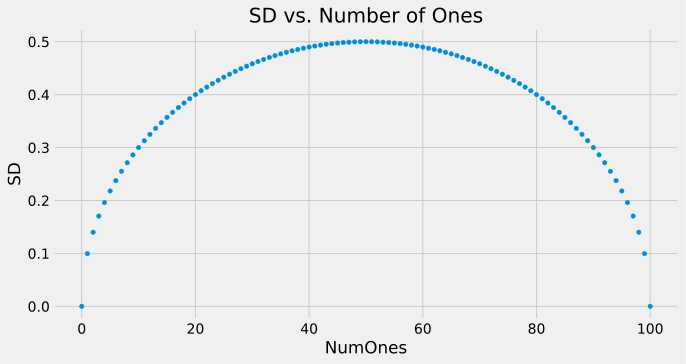

In [28]:
bpd.DataFrame().assign(
    NumOnes=proportions,
    SD=sds
).plot(kind='scatter', x='NumOnes', y='SD', title='SD vs. Number of Ones', figsize=(10, 5));

What do you notice? 🤔

### Bounding the sample SD

- For any data set of 0s and 1s (sample or population), the most the SD can be is 0.5.
    - This happens when half of the values are 0 and half are 1.
- Using 0.5 in place of the sample SD results in a "conservative" confidence interval.
    - Our CI will be at least as narrow as we want.

### Computing a 95% confidence interval

- The interval is:

$$
\left[
\text{sample mean} - 2\cdot \frac{\text{sample SD}}{\sqrt{n}},
\text{sample mean} + 2\cdot \frac{\text{sample SD}}{\sqrt{n}}
\right]
$$

- The width, **which we want to be less than or equal to 0.06**, is:

$$
4 \cdot \frac{\text{sample SD}}{\sqrt{n}}
$$

- From before, rearranging gives

$$n \geq \left( 4 \cdot \frac{\text{sample SD}}{0.06} \right)^2$$

- We know that the **largest possible sample SD** is 0.5. So by substituting 0.5 for the sample SD above, we will get the **the largest possible sample size that we'd need to guarantee a width of at most 0.06**.

### Computing a 95% confidence interval

$$n \geq \left( 4 \cdot \frac{\text{sample SD}}{0.06} \right)^2$$

$$n \geq \left( 4 \cdot \frac{0.5}{0.06} \right)^2$$

So, the sample size we pick is the smallest $n$ that satisfies the above inequality.

In [29]:
(4 * 0.5 / 0.06) ** 2

1111.1111111111113

### Answer: We must poll at least 1112 people to get a 95% CI that is at most 0.06 wide.

### Experiment

- The CLT is telling us that if we repeatedly:
    - take a sample of 1112 people directly from the population, and
    - compute the proportion of people that say "Yes"
- Then roughly 95% of those sample proportions will be within 0.03 of the true proportion.
- Let's run a simulation to verify this!

In [30]:
# Don't look at population_proportion!
population_proportion = np.random.choice(np.arange(0.3, 0.7, 0.01))

### Conduct a poll

First, let's determine how to conduct a single sample.

In [31]:
poll_results = np.random.multinomial(1112, [population_proportion, 1 - population_proportion]) / 1112
poll_results

array([0.58, 0.42])

### Repeat the poll 5000 times

Let's now collect 5000 such samples, giving us 5000 sample proportions.

In [32]:
distribution = np.array([])

for i in np.arange(5000):
    poll_results = np.random.multinomial(1112, [population_proportion, 1 - population_proportion]) / 1112
    distribution = np.append(distribution, poll_results[0])

In [33]:
distribution

array([0.58, 0.6 , 0.57, ..., 0.55, 0.55, 0.57])

### Visualizing the distribution of sample proportions

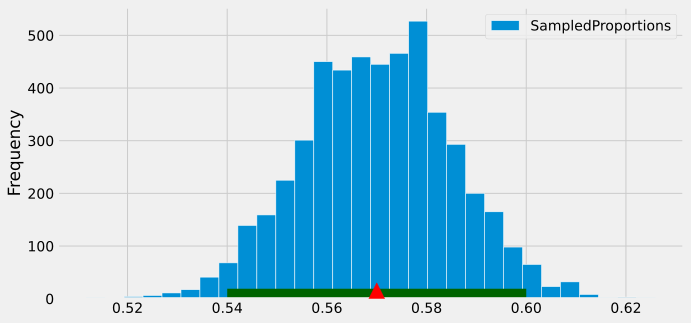

In [34]:
bpd.DataFrame().assign(SampledProportions=distribution).plot(kind='hist', y='SampledProportions', bins=30, figsize=(10, 5), ec='w');
plt.scatter(population_proportion, 0, marker='^', zorder=3, color='red', s=1000, label='Population Proportion')
plt.plot([population_proportion - 0.03, population_proportion + 0.03], [0, 0], color='darkgreen', linewidth=20, label='Population proportion +/- 0.03');

- The triangle in red corresponds to the population proportion, **which we didn't know when deciding the sample size**.
- The interval in green extends 0.03 on both sides of the population proportion.

In [35]:
np.count_nonzero((population_proportion - 0.03 <= distribution) & (distribution <= population_proportion + 0.03)) / 5000

0.9546

- This is showing us that **roughly 95% of the time, the population proportion and the sample proportion are within 0.03 of one another**. 
- This means that we chose the right sample size! If we chose a smaller sample size, the interval would be too narrow.

### You Try

Just now, we found that we must poll 1112 people to get a 95% CI that is at most 0.06 wide.

Suppose we instead want a 95% CI that is 0.03 wide. How many people do we need to poll?

## What we've learned about inference

We're about to switch topics in the course, so let's recap the past few weeks.

> I have collected some data. What can I learn about how my data was generated?

At a high level, the second half of this class has been about using a sample to draw conclusions about the population.

- This is called **statistical inference**.

### Populations and samples

Sometimes, our observed data is in the form of a sample, and we want to use our sample to infer something about the population from which it was drawn. Some example questions:
- What is the value of this population parameter, e.g. the population mean?
    - **Strategy:** Create a confidence interval for the population parameter, using either the bootstrap or CLT (if it applies).
- Is the value of this population parameter equal to $x$?
    - **Strategy:** For a p% significance level, compute a (100-p)% confidence interval. Reject the null (that the parameter is equal to $x$) if $x$ is not in the interval.

### Models

Other times, we want to test the validity of a **model**, which is a set of assumptions about how data were generated.
Some example questions:

- Is the data in this sample consistent with what was expected?
    - **Strategy:** Perform a hypothesis test, with a mean, proportion, or absolute difference as a test statistic.
- Was this sample drawn from this specific categorical distribution?
    - **Strategy:** Perform a hypothesis test, with the total variation distance as a test statistic.
- Are these two samples from the same population?
    - **Strategy:** Perform a permutation test.

### Why does it matter?

- The magic of inference: even if your population is huge, you can still make good estimates using a small random sample.
    - This enables many discoveries in science!

### What's next?

- Now, we'll talk about **prediction** – given a sample, what can I predict about data not in that sample?
    - Example from earlier in the quarter: Galton's method for predicting the heights of children given their parents' heights.
- In the next 2 lectures, we'll focus on **linear regression**, a prediction technique that tries to find the best "linear relationship" between two numeric variables.
    - Along the way, we'll address another idea – **correlation**.
    - You will see linear regression in many more courses – it is one of the most important tools in the data science toolkit.